Neural Networks

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Layer,Lambda
import warnings
warnings.filterwarnings('ignore')

In [76]:
forestfires = pd.read_csv('D:/Assignments/forestfires.csv')
forestfires.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [77]:
forestfires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [78]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
# Dummy variables are already created so we will remove month and day columns :
forestfires.drop(["month","day"], axis=1, inplace=True)

<AxesSubplot:>

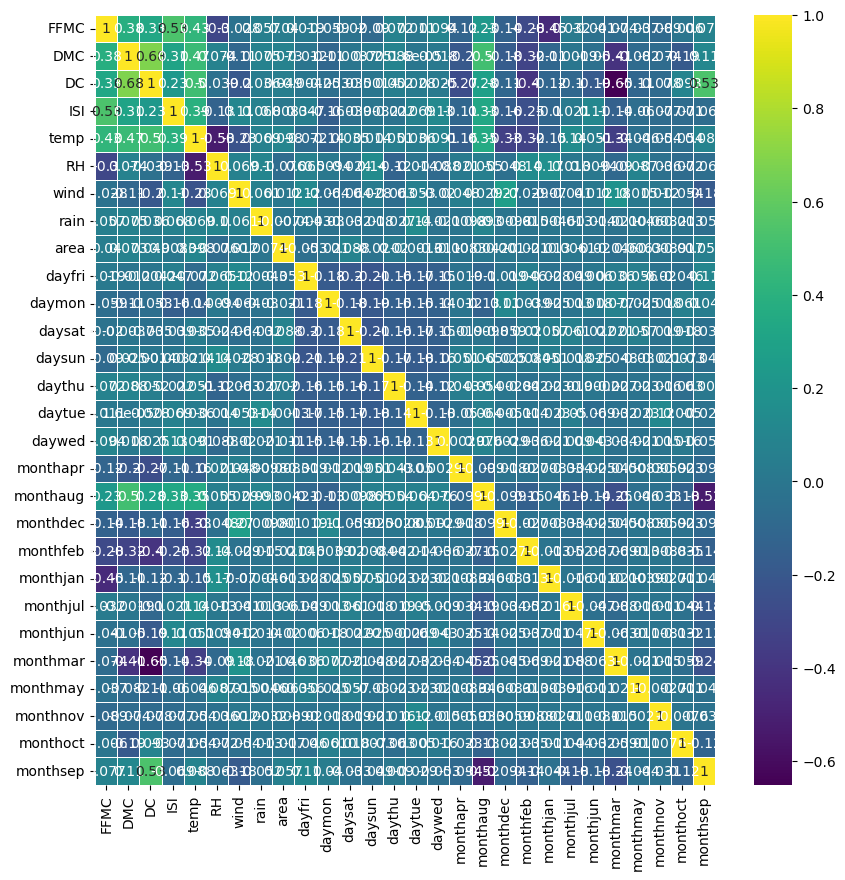

In [80]:
plt.figure(figsize=(10, 10))
sns.heatmap(forestfires.corr(),annot=True,cmap='viridis',linewidths=.5)

In [81]:
# Finding Categorical Data :
print("The FFMC column")
print(forestfires['FFMC'].value_counts())
print()
print("The DMC column")
print(forestfires['DMC'].value_counts())
print()
print("The DC column")
print(forestfires['DC'].value_counts())
print()
print("The ISI column")
print(forestfires['ISI'].value_counts())
print()
print("The TEMP column")
print(forestfires['temp'].value_counts())
print()
print("The RH column")
print(forestfires['RH'].value_counts())
print()
print("The WIND column")
print(forestfires['wind'].value_counts())
print()
print("The RAIN column")
print(forestfires['rain'].value_counts())
print()
print("The AREA column")
print(forestfires['area'].value_counts())
print()
print("The SIZE-CATEGORY column")
print(forestfires['size_category'].value_counts())
print()

The FFMC column
92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: FFMC, Length: 106, dtype: int64

The DMC column
99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64

The DC column
745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: DC, Length: 219, dtype: int64

The ISI column
9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: ISI, Length: 119, dtype: int64

The TEMP column
17.4    8
19.6    8
15.4    7
20.6    7
20.4    6
       ..
16.3    1
12.8    1
10.4    1
8.7     1
25.6    1
Name: temp, Length: 192, dtype: int64

The RH column
27    33
39    24
35    20
43    17
42    17
      ..
96     1
97     1
99     1
18     1
69     1
Name

In [82]:
size_category_map = {"small":0, "large":1}
forestfires["size_category"] = forestfires["size_category"].map(size_category_map)
forestfires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
forestfires["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [84]:
forestfires.shape

(517, 29)

In [85]:
# Defining Predictors and Target Variables :
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]

In [86]:
# Splitting data into Train and Test Data Set :
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.3,stratify=target)

In [87]:
# Model Building :
def prep_model(hidden_dim):
    model = Sequential()
    
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else :
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

    return model

In [88]:
first_model = prep_model([28,50,40,20,1])
history = first_model.fit(np.array(x_train),np.array(y_train),epochs=500)

Epoch 1/500
12/12 [==============================] - 1s 4ms/step - loss: 0.8861 - accuracy: 0.6565
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.7202
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5879 - accuracy: 0.7285
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.7673
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.7978
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7313
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8227
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.8089
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.8089
Epoch 10/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8089
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9640
Epoch 84/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9778
Epoch 85/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9861
Epoch 86/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9751
Epoch 87/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9529
Epoch 88/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9778
Epoch 89/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9806
Epoch 90/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9612
Epoch 91/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9695
Epoch 92/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9695
Epoch 93/500


12/12 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.9557
Epoch 165/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 0.9972
Epoch 166/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9723
Epoch 167/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9972
Epoch 168/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9723
Epoch 169/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9945
Epoch 170/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9834
Epoch 171/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9861
Epoch 172/500
12/12 [==============================] - 0s 865us/step - loss: 0.0374 - accuracy: 0.9889
Epoch 173/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9668
Ep

12/12 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9917
Epoch 246/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9778
Epoch 247/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9945
Epoch 248/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9889
Epoch 249/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 250/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9695
Epoch 251/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9861
Epoch 252/500
12/12 [==============================] - 0s 804us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 253/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.9723
Epoch 254/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9917
Ep

12/12 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 327/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9889
Epoch 328/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9917
Epoch 329/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9945
Epoch 330/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9861
Epoch 331/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 332/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9889
Epoch 333/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 334/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9806
Epoch 335/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoc

12/12 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 0.9972
Epoch 408/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9889
Epoch 409/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9917
Epoch 410/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9945
Epoch 411/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 0.9917
Epoch 412/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9972
Epoch 413/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9889
Epoch 414/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.9723
Epoch 415/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9917
Epoch 416/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.9945
Epoc

12/12 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9945
Epoch 489/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9917
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9778
Epoch 492/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9972
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9889
Epoch 495/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9972
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 497/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoc

In [89]:
pred_train = first_model.predict(np.array(x_train))
pred_train = pd.Series([i[0] for i in pred_train])
pred_train

12/12 [==============================] - 0s 2ms/step


0      2.208521e-17
1      1.121176e-11
2      9.993500e-01
3      5.790888e-13
4      7.258143e-08
           ...     
356    1.871504e-17
357    7.922157e-16
358    1.000000e+00
359    9.247959e-16
360    1.868093e-19
Length: 361, dtype: float32

In [90]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"
pred_train_class

0      small
1      small
2      large
3      small
4      small
       ...  
356    small
357    small
358    large
359    small
360    small
Length: 361, dtype: object

In [91]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()

0    264
1     97
Name: size_category, dtype: int64

In [92]:
#For training data
from sklearn.metrics import confusion_matrix

train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()

confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True))
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,97,0
small,0,264


In [93]:
#For test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"

test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"
test["original_class"].value_counts()

np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True))
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

5/5 [==============================] - 0s 2ms/step


original_class,large,small
row_0,,
large,38,2
small,4,112


In [94]:
# evaluate the model
scores = first_model.evaluate(predictors, target)
print("%s: %.2f%%" % (first_model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9884
accuracy: 98.84%


In [95]:
# list all data in history
first_model.history.history.keys()

dict_keys([])

KeyError: 'val_accuracy'

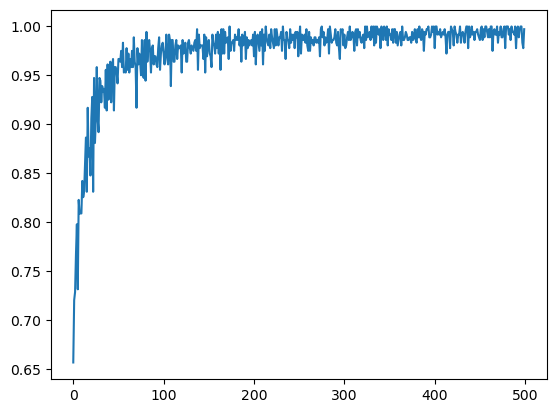

In [96]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'val_loss'

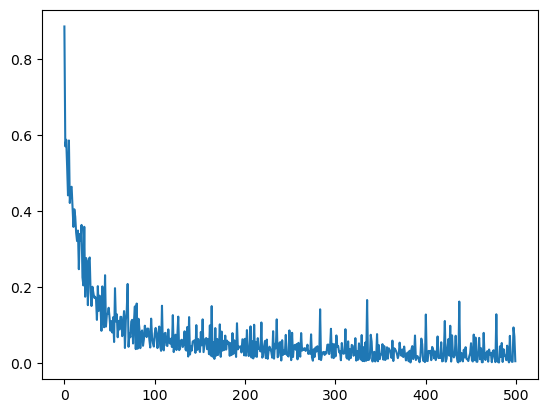

In [97]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()